## Installing PyCaret

![](https://pycaret.org/wp-content/uploads/2020/03/Divi93_43.png)


[PyCaret](https://pycaret.readthedocs.io/en/latest/) is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that speeds up the experiment cycle exponentially.

In comparison with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with few words only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and many more.

In [ ]:
!pip install pycaret[full]
!pip install interpret-community

## Getting the Data

In [87]:
import pandas as pd
import numpy as np
from numpy import sum as arraysum

In [88]:
dataset = pd.read_csv('https://raw.githubusercontent.com/elvanselvano/purwadhika-final-project/main/dataset/dev_preproc.csv')
dataset.drop(['index'], axis=1, inplace=True)
dataset.head()

,BATHRM,HF_BATHRM,HEAT,AC,BEDRM,PRICE,SALE_NUM,GBA,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,LANDAREA,WARD,SALEYEAR,RMDL,AYB_SALEYEAR_DIFF,EYB_SALEYEAR_DIFF,SQFT_ROOMS
0,3,1,Hot Water Rad,1,5,2100000.0,3,2522.0,3 Story,Row Inside,Very Good,5,Common Brick,Built Up,Hardwood,2,4,1680.0,Ward 2,2016,1,106,32,280.222222
1,3,1,Forced Air,1,3,1210000.0,1,2520.0,3 Story,Row Inside,Above Average,5,Common Brick,Built Up,Hardwood,2,3,1853.0,Ward 2,2013,1,113,29,229.090909
2,3,1,Warm Cool,1,4,1550000.0,5,2552.0,3 Story,Row Inside,Above Average,5,Common Brick,Metal- Sms,Hardwood,2,2,1853.0,Ward 2,2016,1,136,49,283.555556
3,3,1,Forced Air,1,4,1599900.0,4,2520.0,3 Story,Row Inside,Above Average,4,Common Brick,Built Up,Hardwood,2,2,1853.0,Ward 2,2015,1,125,48,280.000000
4,3,2,Forced Air,1,4,1700000.0,2,2520.0,3 Story,Row Inside,Above Average,5,Common Brick,Built Up,Hardwood,2,2,1853.0,Ward 2,2017,1,217,50,252.000000


In [89]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15252 entries, 0 to 15251
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BATHRM             15252 non-null  int64  
 1   HF_BATHRM          15252 non-null  int64  
 2   HEAT               15252 non-null  object 
 3   AC                 15252 non-null  int64  
 4   BEDRM              15252 non-null  int64  
 5   PRICE              15252 non-null  float64
 6   SALE_NUM           15252 non-null  int64  
 7   GBA                15252 non-null  float64
 8   STYLE              15252 non-null  object 
 9   STRUCT             15252 non-null  object 
 10  GRADE              15252 non-null  object 
 11  CNDTN              15252 non-null  int64  
 12  EXTWALL            15252 non-null  object 
 13  ROOF               15252 non-null  object 
 14  INTWALL            15252 non-null  object 
 15  KITCHENS           15252 non-null  int64  
 16  FIREPLACES         152

In [90]:
dataset.describe()

,BATHRM,HF_BATHRM,AC,BEDRM,PRICE,SALE_NUM,GBA,CNDTN,KITCHENS,FIREPLACES,LANDAREA,SALEYEAR,RMDL,AYB_SALEYEAR_DIFF,EYB_SALEYEAR_DIFF,SQFT_ROOMS
count,15252.000000,15252.000000,15252.000000,15252.000000,1.525200e+04,15252.000000,15252.000000,15252.000000,15252.000000,15252.000000,15252.000000,15252.000000,15252.000000,15252.000000,15252.000000,15252.000000
mean,2.370509,0.711907,0.845725,3.462300,7.604461e+05,3.011539,1685.197613,4.026882,1.225675,0.641096,2950.126672,2015.010031,0.700892,79.132114,40.999738,227.060225
std,0.984079,0.566485,0.361224,1.064361,4.645319e+05,1.637937,720.571672,0.710136,0.572535,0.866219,2560.029892,1.362245,0.457882,32.833770,16.765044,66.953398
min,1.000000,0.000000,0.000000,0.000000,2.342000e+04,1.000000,371.000000,1.000000,0.000000,0.000000,327.000000,2013.000000,0.000000,0.000000,0.000000,69.333333
25%,2.000000,0.000000,1.000000,3.000000,4.500000e+05,2.000000,1224.000000,4.000000,1.000000,0.000000,1440.000000,2014.000000,0.000000,68.000000,34.000000,180.500000
50%,2.000000,1.000000,1.000000,3.000000,6.750000e+05,3.000000,1504.000000,4.000000,1.000000,0.000000,2034.500000,2015.000000,1.000000,87.000000,46.000000,216.000000
75%,3.000000,1.000000,1.000000,4.000000,9.150000e+05,4.000000,1926.000000,4.000000,1.000000,1.000000,3722.250000,2016.000000,1.000000,102.000000,50.000000,259.808333
max,11.000000,7.000000,1.000000,13.000000,5.450000e+06,15.000000,8622.000000,6.000000,5.000000,7.000000,54335.000000,2017.000000,1.000000,251.000000,74.000000,958.000000


In order to evaluate the predictions on completely unseen data, a sample of 4096 records has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 4096 records were not available at the time when the machine learning experiment was performed.

In [91]:
data_unseen = pd.read_csv('https://raw.githubusercontent.com/elvanselvano/purwadhika-final-project/main/dataset/test_preproc.csv')
data_unseen.drop(['index'], axis=1, inplace=True)
data_unseen.head()

,BATHRM,HF_BATHRM,HEAT,AC,BEDRM,PRICE,SALE_NUM,GBA,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,LANDAREA,WARD,SALEYEAR,RMDL,AYB_SALEYEAR_DIFF,EYB_SALEYEAR_DIFF,SQFT_ROOMS
0,3,1,Warm Cool,1,3,1430000.0,4,1488.0,2 Story,Row Inside,Above Average,5,Common Brick,Built Up,Hardwood,2,1,1424.0,Ward 2,2018,1,110,51,212.571429
1,3,1,Forced Air,1,4,1700000.0,3,2382.0,3 Story,Row Inside,Above Average,6,Common Brick,Metal- Sms,Hardwood,2,3,1853.0,Ward 2,2018,1,218,51,183.230769
2,2,1,Warm Cool,1,3,1363000.0,3,1380.0,2 Story,Row Inside,Average,4,Common Brick,Built Up,Hardwood,2,2,1320.0,Ward 2,2017,1,38,27,125.454545
3,6,0,Hot Water Rad,0,4,1500000.0,5,3582.0,3 Story,Multi,Above Average,3,Common Brick,Built Up,Hardwood,4,0,1760.0,Ward 2,2017,0,77,60,199.000000
4,2,1,Warm Cool,1,3,2150000.0,4,2304.0,3 Story,Row Inside,Very Good,5,Common Brick,Metal- Sms,Hardwood,2,2,1620.0,Ward 2,2018,1,121,14,256.000000


In [92]:
data_unseen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BATHRM             4096 non-null   int64  
 1   HF_BATHRM          4096 non-null   int64  
 2   HEAT               4096 non-null   object 
 3   AC                 4096 non-null   int64  
 4   BEDRM              4096 non-null   int64  
 5   PRICE              4096 non-null   float64
 6   SALE_NUM           4096 non-null   int64  
 7   GBA                4096 non-null   float64
 8   STYLE              4096 non-null   object 
 9   STRUCT             4096 non-null   object 
 10  GRADE              4096 non-null   object 
 11  CNDTN              4096 non-null   int64  
 12  EXTWALL            4096 non-null   object 
 13  ROOF               4096 non-null   object 
 14  INTWALL            4096 non-null   object 
 15  KITCHENS           4096 non-null   int64  
 16  FIREPLACES         4096 

In [93]:
data_unseen.describe()

,BATHRM,HF_BATHRM,AC,BEDRM,PRICE,SALE_NUM,GBA,CNDTN,KITCHENS,FIREPLACES,LANDAREA,SALEYEAR,RMDL,AYB_SALEYEAR_DIFF,EYB_SALEYEAR_DIFF,SQFT_ROOMS
count,4096.000000,4096.000000,4096.000000,4096.000000,4.096000e+03,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000
mean,2.293945,0.650146,0.755127,3.422363,7.920456e+05,3.650635,1653.267334,3.857910,1.240234,0.562988,2933.415283,2017.623291,0.609619,82.555908,47.167725,224.441986
std,1.045496,0.582542,0.430064,1.107121,4.923174e+05,1.437765,729.431786,0.804946,0.623043,0.872277,2389.109465,0.484620,0.487895,31.327375,17.329809,65.971100
min,0.000000,0.000000,0.000000,1.000000,5.100000e+04,1.000000,572.000000,1.000000,0.000000,0.000000,350.000000,2017.000000,0.000000,0.000000,0.000000,81.400000
25%,1.000000,0.000000,1.000000,3.000000,4.500000e+05,3.000000,1184.000000,3.000000,1.000000,0.000000,1505.500000,2017.000000,0.000000,71.000000,41.000000,179.660714
50%,2.000000,1.000000,1.000000,3.000000,7.020850e+05,3.000000,1458.000000,4.000000,1.000000,0.000000,2106.000000,2018.000000,1.000000,88.000000,51.000000,212.000000
75%,3.000000,1.000000,1.000000,4.000000,9.750000e+05,4.000000,1884.000000,4.000000,1.000000,1.000000,3600.000000,2018.000000,1.000000,104.000000,58.000000,257.035714
max,10.000000,4.000000,1.000000,20.000000,5.650000e+06,15.000000,7940.000000,6.000000,4.000000,8.000000,34491.000000,2018.000000,1.000000,227.000000,75.000000,748.250000


The training data are the transactions that happened from 2013 to 2017 which contains 15252 records and the testing data are from 2017 (after the latest transaction from training data) to 2018 which contains 4096 records. We split the testing data to the recent years to simulate real-world scenario.

In [94]:
print(f"Training Data: {dataset['SALEYEAR'].min()} to {dataset['SALEYEAR'].max()}")
print(f"Testing Data: {data_unseen['SALEYEAR'].min()} to {data_unseen['SALEYEAR'].max()}")

Training Data: 2013 to 2017
Testing Data: 2017 to 2018


## Setting up Environment in PyCaret

The `setup()` function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. Besides performing some basic processing tasks by default, PyCaret also offers wide array of pre-processing features which structurally elevates an average machine learning experiment to an advanced solution.

In [38]:
import pycaret.regression as reg

In [95]:
regression_setup = reg.setup(data=dataset, target='PRICE', session_id=42, use_gpu=True,
                         categorical_features=['HEAT', 'STYLE', 'AC', 'STRUCT', 'EXTWALL', 'ROOF', 'INTWALL', 'WARD', 'RMDL', 'CNDTN'],
                         numeric_features=['BATHRM', 'HF_BATHRM', 'BEDRM', 'SALE_NUM', 'SQFT_ROOMS', 'AYB_SALEYEAR_DIFF', 'EYB_SALEYEAR_DIFF', 'GBA', 'KITCHENS', 'FIREPLACES', 'LANDAREA', 'SALEYEAR'],
                         ordinal_features={'GRADE':['Fair Quality', 'Average', 'Above Average', 'Good Quality', 'Very Good', 'Excellent', 'Superior']})

,Description,Value
0,session_id,42
1,Target,PRICE
2,Original Data,"(15252, 24)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,11
6,Ordinal Features,True
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(10676, 108)"


## Baseline Model

When we evaluate a model's performance, it is important to create a baseline model so we can see whether our model improved from the baseline and how much did it improve. Fundamentally, a baseline is a model that is both simple to set up and has a reasonable chance of providing decent results. Experimenting with them is usually quick and low cost, since implementations are widely available in popular packages.

Source: https://blog.insightdatascience.com/always-start-with-a-stupid-model-no-exceptions-3a22314b9aaa

In [96]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X = dataset.drop('PRICE', axis=1)
y = dataset['PRICE']

def evaluate_baseline(model):
     scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
     scores = -scores.mean()
     return scores

dummy_reg_mean = DummyRegressor(strategy="mean")
dummy_reg_median = DummyRegressor(strategy='median')
dummy_reg_quantile = DummyRegressor(strategy='quantile', quantile=0.44)
dummy_reg_constant = DummyRegressor(strategy='constant', constant=450000)

print('Dummy Regressor (mean):', evaluate_baseline(dummy_reg_mean))
print('Dummy Regressor (median): ', evaluate_baseline(dummy_reg_median))
print('Dummy Regressor (quantile):', evaluate_baseline(dummy_reg_quantile))
print('Dummy Regressor (constant):', evaluate_baseline(dummy_reg_constant))

Dummy Regressor (mean): 378508.38848355185
Dummy Regressor (median):  363261.98277385003
Dummy Regressor (quantile): 370175.5453745001
Dummy Regressor (constant): 373849.37680799095


## Comparing All Models

When comparing models, we will create all models using 5 fold cross validation. We will focus on the Mean Absolute Error (MAE) because it is robuts to outliers which exist in our dataset.

In [97]:
models = reg.compare_models(fold=5, sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,8.390286e+04,2.014479e+10,1.414831e+05,9.058000e-01,0.1520,1.150000e-01,3.228
lightgbm,Light Gradient Boosting Machine,8.901812e+04,2.204735e+10,1.481829e+05,8.968000e-01,0.1614,1.231000e-01,0.214
et,Extra Trees Regressor,8.922825e+04,2.344628e+10,1.525843e+05,8.905000e-01,0.1608,1.207000e-01,8.166
xgboost,Extreme Gradient Boosting,9.148741e+04,2.311427e+10,1.516659e+05,8.918000e-01,0.1648,1.252000e-01,1.064
rf,Random Forest Regressor,9.346978e+04,2.585791e+10,1.602440e+05,8.793000e-01,0.1688,1.266000e-01,8.100
gbr,Gradient Boosting Regressor,9.888070e+04,2.487755e+10,1.573799e+05,8.835000e-01,0.1800,1.398000e-01,2.214
br,Bayesian Ridge,1.192539e+05,3.248664e+10,1.798683e+05,8.480000e-01,0.3416,1.858000e-01,0.162
ridge,Ridge Regression,1.194625e+05,3.258370e+10,1.801374e+05,8.475000e-01,0.3498,1.863000e-01,0.052
llar,Lasso Least Angle Regression,1.195049e+05,3.264281e+10,1.802985e+05,8.473000e-01,0.3462,1.864000e-01,0.058
lasso,Lasso Regression,1.195941e+05,3.265673e+10,1.803389e+05,8.472000e-01,0.3504,1.866000e-01,1.256


## Create a Model

![](https://avatars.mds.yandex.net/get-yablogs/51163/file_1500371746775/orig)

[CatBoost](https://catboost.ai/) is an algorithm for gradient boosting on decision trees. It is developed by Yandex researchers and engineers, and is used for search, recommendation systems, personal assistant, self-driving cars, weather prediction and many other tasks at Yandex and in other companies, including CERN, Cloudflare, Careem taxi. It is in open-source and can be used by anyone.

Based on the above benchmark, we can see that CatBoost is the top performing model with Mean Absolute Error of 7.791458e+04 during the 5-fold cross validation. Therefore, we will create a catboost model and tune its parameters in the next step.

In [98]:
catboost = reg.create_model('catboost', random_state=42)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,87418.9438,2.625799e+10,162043.1706,0.8971,0.1538,0.1172
1,83796.6975,1.821039e+10,134945.8850,0.9164,0.1435,0.1120
2,85918.5065,1.932010e+10,138996.7745,0.9136,0.1664,0.1226
3,84972.0902,1.884954e+10,137293.6395,0.9045,0.1503,0.1160
4,81042.8954,1.835503e+10,135480.7383,0.9081,0.1468,0.1115
5,83158.7305,2.036853e+10,142718.3665,0.9008,0.1433,0.1101
6,77374.2900,1.360118e+10,116624.0807,0.9285,0.1644,0.1192
7,80354.7371,1.577944e+10,125616.2276,0.9171,0.1429,0.1102
8,83765.7347,1.995995e+10,141279.6736,0.9142,0.1482,0.1135
9,86964.5753,2.670460e+10,163415.4360,0.8771,0.1574,0.1135


## Tuning the Model

In order to tune the model, we use the library [Hyperopt](http://hyperopt.github.io/hyperopt/), an open source hyperparameter optimization framework to automate hyperparameter search. It efficiently search large spaces and prune unpromising trials for faster results. Since it doesn't produce better model, we will proceed with the original model.

In [99]:
tuned_catboost = reg.tune_model(catboost, search_library = "tune-sklearn", search_algorithm="hyperopt",  optimize="MSE", n_iter=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,92452.7726,2.911996e+10,170645.7019,0.8859,0.1633,0.1252
1,84839.4303,1.773904e+10,133187.9860,0.9185,0.1472,0.1151
2,88880.5309,2.019599e+10,142112.5936,0.9097,0.1713,0.1269
3,86936.7931,2.022533e+10,142215.7749,0.8975,0.1566,0.1197
4,83115.5847,1.904422e+10,138000.8033,0.9046,0.1520,0.1151
5,87124.1120,2.131334e+10,145990.8807,0.8962,0.1495,0.1161
6,80310.1356,1.433902e+10,119745.6333,0.9246,0.1680,0.1234
7,84651.4068,1.672678e+10,129332.0647,0.9121,0.1483,0.1163
8,87618.6565,2.168594e+10,147261.4523,0.9067,0.1554,0.1200
9,89908.3622,2.653744e+10,162903.1727,0.8779,0.1606,0.1209


#### Prediction Error Plot

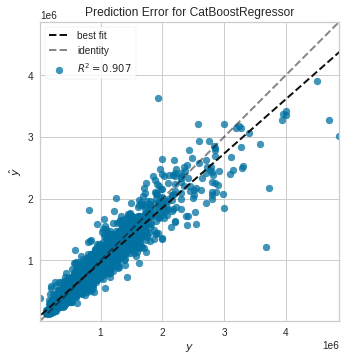

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [102]:
reg.plot_model(catboost, plot = 'error')

#### Learning Curve

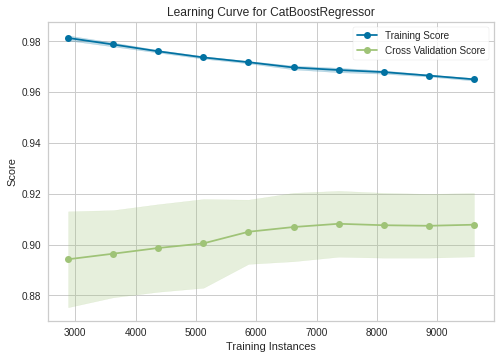

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [103]:
reg.plot_model(catboost, plot = 'learning')

#### Validation Curve

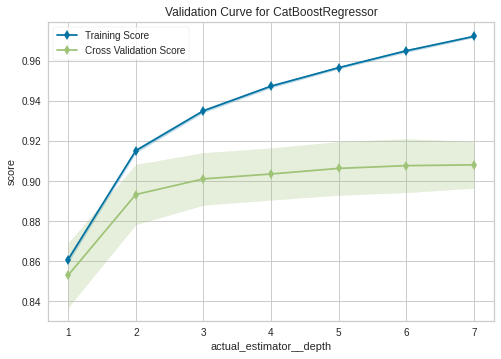

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [104]:
reg.plot_model(catboost, plot = 'vc')

#### Feature Importance Using SHAP

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=<catboost.core.CatBoostRegressor object at 0x7f30171a4e90>, use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


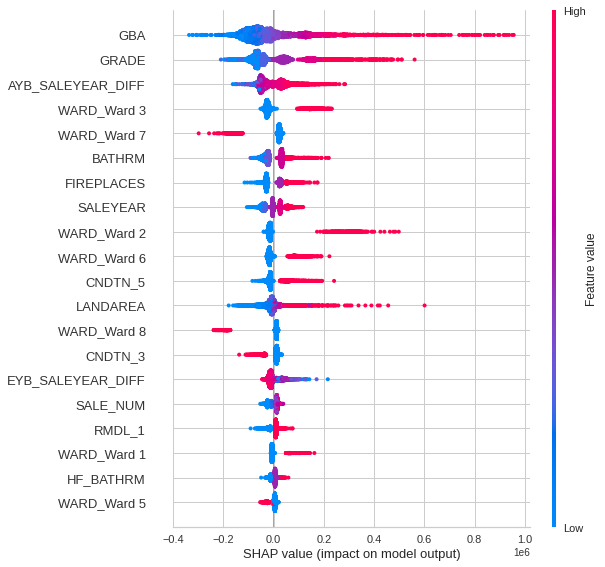

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [105]:
reg.interpret_model(catboost)

## Finalize and save the model

After evaluate the results on development data, we will finalize the model by train it using the whole development data and then evaluate it on the testing data to simulate real-world scenario.

In [106]:
final_model = reg.finalize_model(catboost)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=<catboost.core.CatBoostRegressor object at 0x7f30171a4e90>, fit_kwargs=None, groups=None, model_only=True, display=None)
INFO:logs:Finalizing <catboost.core.CatBoostRegressor object at 0x7f30171a4e90>
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=<catboost.core.CatBoostRegressor object at 0x7f30171a4e90>, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, display=None, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Declaring custom model
INFO:logs:CatBoost Regressor Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with KFold(n_splits=10, random_state=None, shuffle=False), n_jobs=1
INFO:logs:Calculating

In [107]:
reg.save_model(final_model, model_name='catboost_model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=<catboost.core.CatBoostRegressor object at 0x7f30d4fd3090>, model_name=catboost_model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['HEAT', 'STYLE',
                                                            'AC', 'STRUCT',
                                                            'EXTWALL', 'ROOF',
                                                            'INTWALL', 'WARD',
                                                            'RMDL', 'CNDTN'],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['BATHRM', 'HF_BATHRM',
                                                          'BEDRM', 'SALE_NUM',
                                                          'SQFT_ROOMS',
             

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['HEAT', 'STYLE',
                                                             'AC', 'STRUCT',
                                                             'EXTWALL', 'ROOF',
                                                             'INTWALL', 'WARD',
                                                             'RMDL', 'CNDTN'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['BATHRM', 'HF_BATHRM',
                                                           'BEDRM', 'SALE_NUM',
                                                           'SQFT_ROOMS',
                                                           'AYB_SALEYEAR_DIFF',
                                                           'EYB_SALEYEAR_DIFF',
  

## Predictions on unseen data

During prediction, we will use prediction interval. Prediction interval is a quantification of the uncertainty on a prediction which provides a probabilistic upper and lower bounds on the estimate of an outcome variable.

In this case, we will use 95% prediction interval which means: *Given a prediction of ‘y’ given ‘x’, there is a 95% likelihood that the range ‘a’ to ‘b’ covers the true outcome*

![](https://machinelearningmastery.com/wp-content/uploads/2018/04/Relationship-between-prediction-actual-value-and-prediction-interval.png)

Source: https://machinelearningmastery.com/prediction-intervals-for-machine-learning/

In [108]:
saved_catboost = reg.load_model('catboost_model')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=catboost_model, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


A prediction interval is different from a confidence interval. A confidence interval quantifies the uncertainty on an estimated population variable, such as the mean or standard deviation. Whereas a prediction interval quantifies the uncertainty on a single observation estimated from the population.

In [109]:
data_unseen_features = data_unseen.drop('PRICE', axis=1)
data_unseen_target = data_unseen['PRICE']
predictions = reg.predict_model(saved_catboost, data=data_unseen_features)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['HEAT', 'STYLE',
                                                            'AC', 'STRUCT',
                                                            'EXTWALL', 'ROOF',
                                                            'INTWALL', 'WARD',
                                                            'RMDL', 'CNDTN'],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['BATHRM', 'HF_BATHRM',
                                                          'BEDRM', 'SALE_NUM',
                                                          'SQFT_ROOMS',
                                                          'AYB_SALEYEAR_DIFF',
                      

In [110]:
label = predictions['Label']
y = data_unseen_target

We can estimate the standard deviation in the prediction direction using the following formula:

`SE = sqrt(1 / (N - 2) * e(i)^2 for i to N)`

In [111]:
sum_errs = arraysum((y - label)**2)
stdev = np.sqrt(1/(len(y)-2) * sum_errs)
print(sum_errs, stdev)

118685224018531.16 170264.61776643083


We will use the significance level of 50%, which is 0.67449 standard deviations.

In [112]:
interval = 0.67449 * stdev
print(interval)

114841.78203727993


Once the interval is calculated, we can summarize the bounds on the prediction to the user.

In [113]:
lower, upper = label - interval, label + interval

## Evaluate Predictions

In [114]:
predictions

,BATHRM,HF_BATHRM,HEAT,AC,BEDRM,SALE_NUM,GBA,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,LANDAREA,WARD,SALEYEAR,RMDL,AYB_SALEYEAR_DIFF,EYB_SALEYEAR_DIFF,SQFT_ROOMS,Label
0,3,1,Warm Cool,1,3,4,1488.0,2 Story,Row Inside,Above Average,5,Common Brick,Built Up,Hardwood,2,1,1424.0,Ward 2,2018,1,110,51,212.571429,1.412580e+06
1,3,1,Forced Air,1,4,3,2382.0,3 Story,Row Inside,Above Average,6,Common Brick,Metal- Sms,Hardwood,2,3,1853.0,Ward 2,2018,1,218,51,183.230769,1.992842e+06
2,2,1,Warm Cool,1,3,3,1380.0,2 Story,Row Inside,Average,4,Common Brick,Built Up,Hardwood,2,2,1320.0,Ward 2,2017,1,38,27,125.454545,1.116004e+06
3,6,0,Hot Water Rad,0,4,5,3582.0,3 Story,Multi,Above Average,3,Common Brick,Built Up,Hardwood,4,0,1760.0,Ward 2,2017,0,77,60,199.000000,1.102733e+06
4,2,1,Warm Cool,1,3,4,2304.0,3 Story,Row Inside,Very Good,5,Common Brick,Metal- Sms,Hardwood,2,2,1620.0,Ward 2,2018,1,121,14,256.000000,1.980626e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,1,0,Warm Cool,1,2,7,992.0,2 Story,Semi-Detached,Average,5,Common Brick,Comp Shingle,Hardwood,1,0,1528.0,Ward 8,2017,1,67,48,248.000000,2.565753e+05
4092,1,0,Warm Cool,1,2,3,832.0,2 Story,Semi-Detached,Average,3,Common Brick,Comp Shingle,Hardwood,1,0,1528.0,Ward 8,2018,0,68,58,208.000000,1.812154e+05
4093,1,0,Forced Air,0,2,3,832.0,2 Story,Semi-Detached,Average,4,Common Brick,Comp Shingle,Hardwood,1,0,1528.0,Ward 8,2018,1,68,49,208.000000,2.266561e+05
4094,2,1,Forced Air,1,2,4,832.0,2 Story,Row Inside,Above Average,5,Common Brick,Slate,Hardwood,1,0,1069.0,Ward 8,2018,1,77,51,138.666667,3.622568e+05


First, we will evaluate the number of records that are in our prediction interval. We can see that out of 4096 records, there are 3523 records that are in the interval.

In [115]:
data_unseen.sample(10)

,BATHRM,HF_BATHRM,HEAT,AC,BEDRM,PRICE,SALE_NUM,GBA,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,LANDAREA,WARD,SALEYEAR,RMDL,AYB_SALEYEAR_DIFF,EYB_SALEYEAR_DIFF,SQFT_ROOMS
1299,2,2,Warm Cool,1,3,1001421.0,3,2024.0,2 Story,Single,Very Good,3,Common Brick,Slate,Hardwood,2,1,5447.0,Ward 4,2018,1,81,46,289.142857
1338,1,0,Hot Water Rad,0,3,695000.0,4,1120.0,2 Story,Semi-Detached,Good Quality,3,Brick/Stucco,Comp Shingle,Hardwood,1,1,2497.0,Ward 3,2018,0,93,58,186.666667
3873,2,0,Forced Air,1,3,424000.0,3,1764.0,2 Story,Single,Above Average,4,Brick/Siding,Comp Shingle,Hardwood,1,1,7845.0,Ward 8,2017,1,112,50,294.000000
2083,1,1,Hot Water Rad,1,3,635000.0,3,1596.0,2 Story,Row End,Average,3,Common Brick,Metal- Sms,Hardwood,1,0,1800.0,Ward 4,2017,0,90,63,199.500000
1498,3,1,Forced Air,1,4,1115000.0,5,2239.0,2 Story,Row Inside,Good Quality,4,Common Brick,Metal- Sms,Hardwood,1,1,2719.0,Ward 1,2017,1,92,42,279.875000
1966,2,1,Hot Water Rad,0,5,688425.0,3,1288.0,2 Story,Row End,Average,3,Common Brick,Metal- Sms,Wood Floor,2,1,1632.0,Ward 4,2018,0,118,75,128.800000
3505,2,2,Warm Cool,1,3,457700.0,3,2240.0,3 Story,Row Inside,Average,4,Brick/Siding,Comp Shingle,Hardwood,1,0,2000.0,Ward 7,2018,0,0,0,248.888889
2010,3,0,Hot Water Rad,0,3,820000.0,2,1563.0,2 Story,Single,Above Average,4,Brick Veneer,Comp Shingle,Hardwood,1,1,4945.0,Ward 4,2018,1,93,51,260.500000
96,5,1,Warm Cool,1,6,2049000.0,2,3663.0,3 Story,Row End,Very Good,4,Common Brick,Built Up,Hardwood,3,4,1853.0,Ward 2,2018,1,153,55,261.642857
3513,1,1,Warm Cool,1,3,232750.0,3,1224.0,2 Story,Semi-Detached,Average,4,Common Brick,Comp Shingle,Hardwood,1,0,3388.0,Ward 7,2018,1,54,46,204.000000


In [116]:
data_unseen.shape

(4096, 24)

In [117]:
data_unseen[(data_unseen['PRICE'] > lower) & (data_unseen['PRICE'] < upper)].shape

(2917, 24)

In [118]:
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Max Error: " + str(max_error(data_unseen_target, predictions["Label"])))
print("Mean Absolute Error: " + str(mean_absolute_error(data_unseen_target, predictions["Label"])))
print("R2 Score: " + str(r2_score(data_unseen_target, predictions["Label"])))
print("Root Mean Squared Error: " + str(mean_squared_error(data_unseen_target, predictions["Label"], squared=False)))

Max Error: 2898170.636135785
Mean Absolute Error: 100915.13123111958
R2 Score: 0.8804217204635538
Root Mean Squared Error: 170223.0441807137
